In [120]:
import pandas as pd
df=pd.read_csv("diabetes.csv")

In [121]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
df.shape

(768, 9)

In [123]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [124]:
df.duplicated().sum()

0

In [125]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

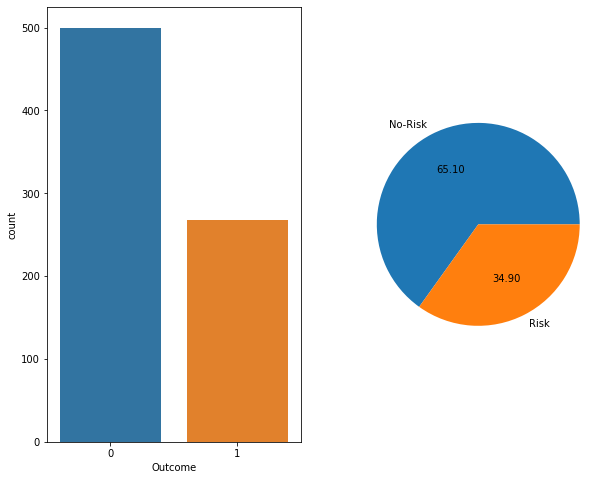

In [126]:
import seaborn as sn
import matplotlib.pyplot as plt

figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

sn.countplot(df.Outcome,ax=plot1[0])

plt.pie(df.Outcome.value_counts() , labels =["No-Risk","Risk"] ,autopct='%.02f' );

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


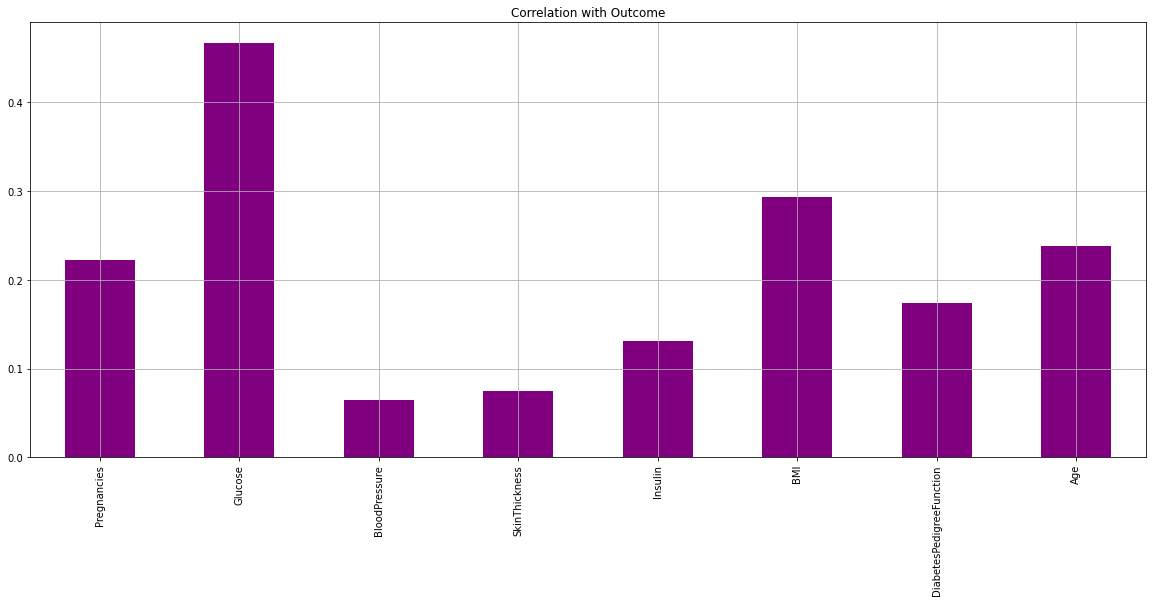

In [130]:
df.drop('Outcome', axis=1).corrwith(df.Outcome).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Outcome",color="Purple");

# With data Standardization using standaedscaller

In [131]:
X = df.drop(['Outcome'],axis=1)
y = df.Outcome

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scal = scaler.fit_transform(X)

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scal,y, test_size = 0.3,random_state=42)

In [134]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
result = []

**Train Different ML Classifier**

In [136]:
#Random Forest
clf = RandomForestClassifier().fit(x_train,y_train)
RF_pred = clf.predict(x_test)
RF_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,RF_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
result.append({
    'Classifier': 'Random Forest',
    'Precision': precision,
    'Recall':recall,
    'Accuracy':acc,
})

In [137]:
#Decision Tree
clf = DecisionTreeClassifier(max_depth=15).fit(x_train,y_train)
DT_pred = clf.predict(x_test)
DT_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,DT_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
result.append({
    'Classifier': 'Decision Tree',
    'Precision': precision,
    'Recall':recall,
    'Accuracy':acc,
})

In [138]:
#Logistic Regression
clf = LogisticRegression().fit(x_train,y_train)
Los_pred = clf.predict(x_test)
Los_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,Los_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
result.append({
    'Classifier': 'Logistic Regression',
    'Precision': precision,
    'Recall':recall,
    'Accuracy':acc,
})

In [139]:
#K- Nearest Neighbour
clf = KNeighborsClassifier(n_neighbors=15).fit(x_train,y_train)
Knn_pred = clf.predict(x_test)
Knn_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,Knn_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
result.append({
    'Classifier': 'K-Nearest Neighbors',
    'Precision': precision,
    'Recall':recall,
    'Accuracy':acc,
})

In [140]:
# Support vector machine
clf = SVC(probability=True).fit(x_train,y_train)
svm_pred = clf.predict(x_test)
svm_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,svm_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
result.append({
    'Classifier': 'SVM',
    'Precision': precision,
    'Recall':recall,
    'Accuracy':acc,
})

In [141]:
# Naive bayes'
clf = GaussianNB().fit(x_train,y_train)
gnb_pred = clf.predict(x_test)
gnb_proba = clf.predict_proba(x_test)
tn, fp, fn, tp = confusion_matrix(y_test,gnb_pred).ravel()

precision = round((tp/(tp+fp)),2)
recall = round((tp/(tp+fn)),2)
acc = round(((tp+tn)/len(x_test)),2)
result.append({
    'Classifier': 'Naive Baye\'s',
    'Precision': precision,
    'Recall':recall,
    'Accuracy':acc,
})

In [142]:
pd.DataFrame(result)

,Classifier,Precision,Recall,Accuracy
0,Random Forest,0.64,0.65,0.75
1,Decision Tree,0.58,0.74,0.73
2,Logistic Regression,0.62,0.62,0.74
3,K-Nearest Neighbors,0.63,0.49,0.72
4,SVM,0.65,0.60,0.75
5,Naive Baye's,0.62,0.66,0.74


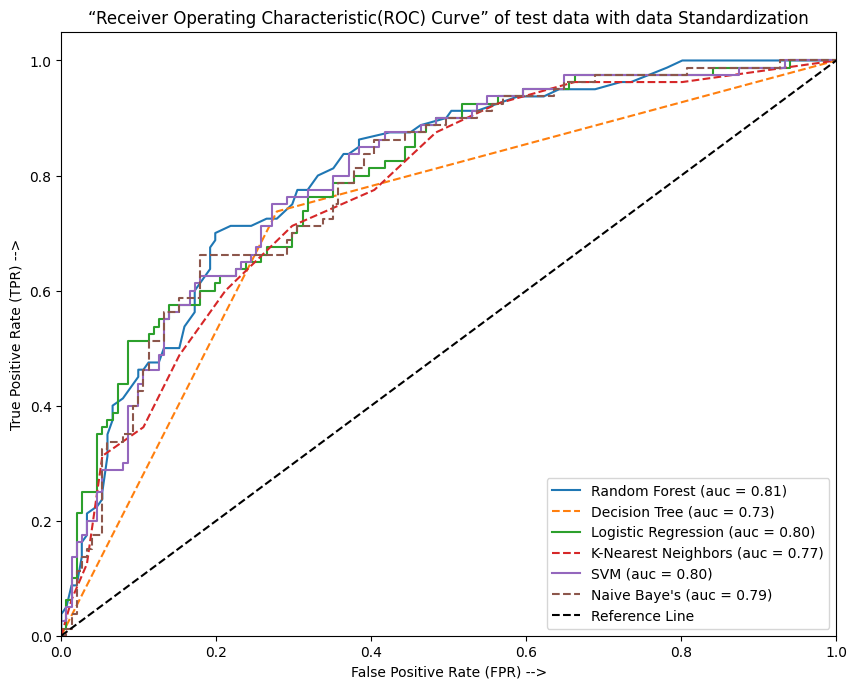

In [143]:
plt.figure(figsize=(10, 8), dpi=100)

def plot_roc(name,pred,i):
    fpr, tpr, threshold = roc_curve(y_test, pred)
    auc_ = auc(fpr,tpr)
    
    if i%2==0:
        plt.plot(fpr,tpr, linestyle='--', label = name+' (auc = %0.2f)' % auc_)
    else:
        plt.plot(fpr,tpr, linestyle='-', label = name+' (auc = %0.2f)' % auc_)
    

plot_roc('Random Forest',RF_proba[:,1],1)
plot_roc('Decision Tree',DT_proba[:,1],2)
plot_roc('Logistic Regression',Los_proba[:,1],3)
plot_roc('K-Nearest Neighbors',Knn_proba[:,1],4)
plot_roc('SVM',svm_proba[:,1],5)
plot_roc('Naive Baye\'s',gnb_proba[:,1],6)


plt.plot([0,1],[0,1],'k--',label = 'Reference Line')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('“Receiver Operating Characteristic(ROC) Curve” of test data with data Standardization')
plt.xlabel('False Positive Rate (FPR) -->')
plt.ylabel('True Positive Rate (TPR) -->')

plt.legend()
# plt.savefig('AUROC of test data with data Standardization')
plt.show()

# Build Model
> according to our precision, recall, accuracy and AUC curve we can say that Random Forest classifier is suitable for us

In [144]:
model = RandomForestClassifier().fit(x_train,y_train)

In [145]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Load Model

In [146]:
mod = pickle.load(open('model.pkl', 'rb'))
sac = pickle.load(open('scaler.pkl', 'rb'))

# Make Prediction

In [147]:
data = [6,	148	, 72,	35,	0,	33.6,	0.627,	50] #result is 1 means risk
data_scal = sac.transform([data])

In [148]:
result = mod.predict(data_scal)[0]
if result == 0:
  print('You have no chance of Diabetes')
else:
  print('You have a chnace of having Diabetes')

You have a chnace of having Diabetes
